In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.graph_objects as go

In [3]:
def objective_func(X,eq):
    if eq==1:
        output = 10 * -np.cos(2 * (X[0] ** 2+X[1] ** 2) ** 0.5) * \
                        np.exp(-0.5 * ((X[0]+1) ** 2+(X[1]-1) ** 2) ** 0.5) + 5.1
    elif eq==2:
        output = -1*(0.2 + X[0]**2 + X[1]**2 - 0.1*np.cos(6*np.pi*X[0]) - 0.1*np.cos(6*np.pi*X[1]) )
    elif eq==3:
        output = -1 * (X[0]**2 + X[1]**2)
    return output
    

In [4]:
initial=[0.8,-0.5]

In [5]:
lb=[-1,-1]
ub=[1,1]
stepSize = [0.05,0.05]
nVar=len(initial)

In [6]:
cost_initial = objective_func(initial,1)

In [7]:
cost_initial

6.063036325209618

In [23]:
def getNeighbours(A,step,lu,ub,func_no):
    x,y = A.pos
#     print(x,y)
#     print(step)
    neighbours=[]
#     for i,j in [(x-step[0],y),(x,y-step[1]),(x+step[0],y),(x,y+step[1])]:
        
#         if lb[0]<=i<=ub[0] and lb[1]<=j<=ub[1]:
#             cost = objective_func([i,j],1)
#             newstate = State()
#             newstate.pos,newstate.cost=([i,j],cost)
#             neighbours.append(newstate)
        
            
            
    for i in range(len(A.pos)):
        B = State()
        B.pos = A.pos.copy()
        B.pos[i] = min(ub[i], B.pos[i] + step_size) 
        B.cost = objective_func(B.pos, func_no)
        neighbours.append(B)
        
        B = State()
        B.pos = A.pos.copy()
        B.pos[i] = max(lb[i], B.pos[i] - step_size)
        B.cost = objective_func(B.pos, func_no)
        neighbours.append(B)
        
    return np.random.choice(neighbours)

In [24]:
class State:
    
    def __init__(self):
        self.pos = [0,0]
        self.cost = 0
    def __repr__(self):
        return f'position {self.pos} with cost {self.cost}'

In [76]:
def cal_cost(A,lb,ub,To,alpha,iteration,stepSize,eq):
    imporvement = False
    costs=[]
    x=[]
    y=[]
    To=To
    T=To
    alpha = alpha
    iteration=iteration
    while iteration!=0 :
        costs.append(A.cost)
        
        B = getNeighbours(A,stepSize,lb,ub,eq)
#         print(B)
        delta = A.cost > B.cost
        
        if delta < 0:
            A.cost=B.cost
            A.pos=B.pos.copy()
        else:
            p=np.exp(-(delta/T))
            r = np.random.rand(1)
            if r<p:
                A.cost=B.cost
                A.pos=B.pos.copy()
                x.append(A.pos[0])
                y.append(A.pos[1])
        T=alpha*T
#         if iteration% 10==0:print(iteration)
        iteration -= 1
    return costs,x,y,A
            
        
    

In [141]:
def make_plot(A,costs,x,y,ub,lb,eq):
    
#     ax.title('Cost')

    #######################
    n=60
    x = np.linspace(lb[0],ub[0], n)
    y = np.linspace(lb[1],ub[1], n)

    X, Y = np.meshgrid(x, y)
    Z = np.zeros((X.shape))
    for i in range(n):
        for j in range(n):
            Z[i,j] = objective_func([X[i,j],Y[i,j]],eq)
            
    fig = go.Figure(data=[go.Surface(x=X,y=Y,z=Z)])
    fig.add_scatter3d(x=[A.pos[0]],y=[A.pos[1]],z=[A.cost])
#     fig.add_scatter3d(x=x,y=y,z=costs)
    
    fig.update_layout(title='surface',
    #                   autosize=True,
                      width=800, 
                      height=400,
    #                   margin=dict(l=65, r=50, b=65, t=90)
                     )

    fig.show()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylabel('Value of A.cost')
    ax.set_xlabel('Iteration #')
    ax.plot(costs)
    

In [145]:
# costs
func_no = 1
position = np.array([0, 0], dtype=float)
cost = objective_func(position, func_no)
step_size = 0.05
ub = np.array([2, 2], dtype=float)
lb = np.array([-2, -2], dtype=float)

solution position [1.0500000000000003, -1.0000000000000004] with cost 7.41894617581082


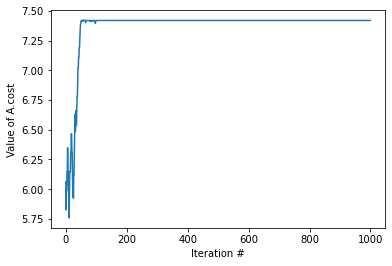

In [146]:
A = State()
A.pos,A.cost=initial,cost_initial
alpha=0.99
iteration=1000
To=1
costs,x,y,A = cal_cost(A,lb,ub,To,alpha,iteration,stepSize=[0.01,0.01],eq=func_no)
make_plot(A,costs,x,y,ub,lb,eq=func_no)
print(f'solution {A}')

<img src="./newplot.png" width=1000 height=600 />

solution position [-3.1918912e-16 -3.1918912e-16] with cost -0.0


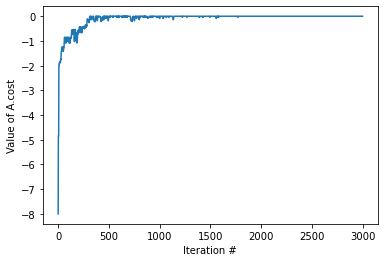

In [142]:
func_no=2
costs=[]
position = np.array([2, 2], dtype=float)
cost = objective_func(position, func_no)
ub = np.array([1,1], dtype=float)
lb = np.array([-1, -1], dtype=float)
A = State()
alpha=0.999
iteration=3000
To=1
A.pos,A.cost=position,cost
costs ,x,y,A= cal_cost(A,lb,ub,To,alpha,iteration,stepSize=[0.01,0.01],eq=func_no)
# print(costs)
make_plot(A,costs,x,y,ub,lb,eq=func_no)
print(f'solution {A}')

<img src="./newplot (1).png" width=1000 height=600 />

solution position [-1.20736754e-15 -1.20736754e-15] with cost -2.9154727498133976e-30


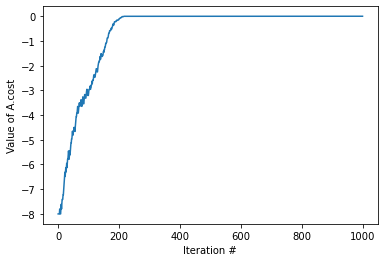

In [127]:
func_no=3
position = np.array([2, 2], dtype=float)
cost = objective_func(position, func_no)
ub = np.array([2, 2], dtype=float)
lb = np.array([-2, -2], dtype=float)
A = State()
A.pos,A.cost=(position,cost)
alpha=0.99
iteration=1000
To=3
costs ,x,y,A= cal_cost(A,lb,ub,To,alpha,iteration,stepSize=[0.01,0.01],eq=func_no)

make_plot(A,costs,x,y,ub,lb,eq=func_no)
print(f'solution {A}')

<img src="./newplot (2).png" width=1000 height=600 />